In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('output_file.xlsx',index_col=0)

In [152]:
%matplotlib inline
plt.style.use('dark_background') 

In [153]:
print(df.shape)
print(df.describe())

(315, 55)
       10th Percentage   12th Percentange  UG - CGPA (out of 10)   \
count        315.000000        315.000000              315.000000   
mean          28.780578         27.738477               69.996381   
std           38.711050         36.735376               11.868543   
min            0.000000          0.000000                0.000000   
25%            0.000000          0.000000               65.000000   
50%            0.000000          0.000000               69.000000   
75%           74.800000         69.780000               77.950000   
max          100.000000         98.700000              100.000000   

       GPA (Out of 4)  PG - CGPA or %   Work Exp.       noopt    UniScore  
count      315.000000      315.000000  315.000000  315.000000  315.000000  
mean        70.359365       14.463683    5.597778    0.660317   84.460063  
std         12.222393       29.328159    5.278863    0.474355   31.953381  
min          0.000000        0.000000    0.000000    0.000000   

In [154]:
df.columns

Index(['Candidate Name', 'Counselor Name', 'Block Amount Received Date',
       'Univ. Pitched', 'Candidate Preferred College #1',
       'Candidate Preferred College #2', '10th Percentage ',
       '12th Percentange', 'UG - CGPA (out of 10) ', 'GPA (Out of 4)',
       'PG - CGPA or %', 'Work Exp.', 'Highest Education',
       'Designation - Company Name ', 'Candidate Application Status',
       'Candidate Loan Status', 'KYC & Acad Documents Received',
       'Tech Exam Scores', 'Coding Test Score', 'English Exam Scores',
       'English Interview Score (15)', 'Tech. interview Score (10)',
       'Application Type', 'Intake Status', 'U1Choice of School #1',
       'U1Choice of Program #1', 'U1Passport #1', 'U1Resume #1', 'U1Degree #1',
       'U1Transcript #1', 'U1Application Status #1', 'U1Offer Letter #1',
       'U2Choice of School #2', 'U2Choice of Program #2',
       'U2Application Status #2', 'U2Offer Letter #2', 'U2Deposit #2',
       'U3Choice of School #3', 'U3Choice of Progra

Popularly Chosen Schools


Number of available choices :  24 

No Choice                                                                  432
university at buffalo (suny), school of management                          73
depaul kellstadt graduate school of business                                68
rutgers business school                                                     48
drexel university, college of computing informatics                         41
drexel university, lebow college of business                                38
drexel university, college of engineering                                   32
rit, saunders college of business                                           26
fairfield university, charles f. dolan school of business                   21
rider university, brodsky college of business                               20
cwru, weatherhead school of management                                      18
tulane university, school of science and engineering                        18
west texas a&m u

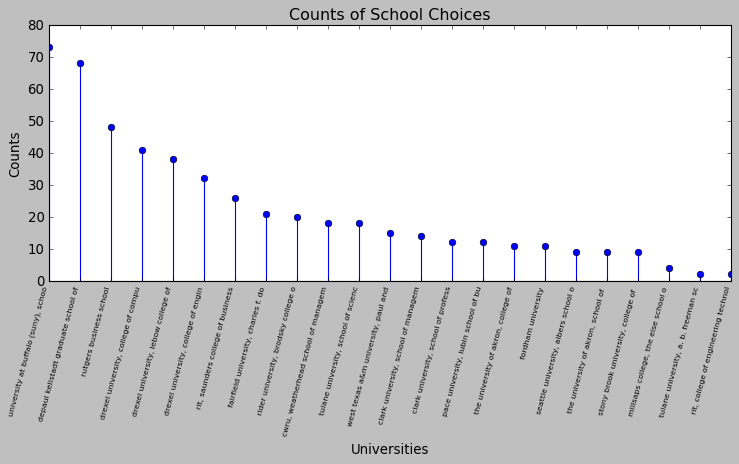

In [197]:

plt.style.use('classic') 

checkcol = ['U1Choice of School #1', 'U2Choice of School #2', 'U3Choice of School #3']

unis = pd.concat([df[col] for col in checkcol])

uniqueuni = unis.unique()

print("Number of available choices : ",len(uniqueuni),'\n')

uni_val_counts = unis.value_counts()

print(uni_val_counts)

value_to_exclude = 'No Choice'
filterd_uni_val_counts = uni_val_counts[uni_val_counts.index != value_to_exclude]

plt.figure(figsize=(11, 4))

truncated_labels = [label[:35] for label in filterd_uni_val_counts.index]
plt.stem(truncated_labels, filterd_uni_val_counts)

# plt.bar(filterd_uni_val_counts.index,filterd_uni_val_counts)

plt.xlabel('Universities')
plt.ylabel('Counts')
plt.title('Counts of School Choices')
plt.xticks(rotation=75,fontsize = 7,ha='right')
plt.show()


In [156]:
df['UniScore'].quantile(0.75)
df['UniScore'].quantile(0.25)
df['UniScore'].max()
df['UniScore'].mean()

84.4600634920635

Make two new temporary dataframes which only contains students who received at least one offer letter or didnt

In [157]:
select_stds_df = df[df['noopt'] == 1]
not_select_stds_df = df[df['noopt'] == 0]

select_stds_df.to_excel('selectedStudents.xlsx')
not_select_stds_df.to_excel('notSelectedStudents.xlsx')

# print(select_stds_df.shape)
# print(not_select_stds_df.shape)

print("No of students who dont receive any offer letters : ",len(not_select_stds_df))
print("No of students who received a offer letters : ",len(select_stds_df))

No of students who dont receive any offer letters :  107
No of students who received a offer letters :  208


Compare UniScores(aggregate of UG and PG) between selected and unselected students

In [158]:
print("Average of unselected students : ",not_select_stds_df['UniScore'].mean())
print("Average of selected students : ",select_stds_df['UniScore'].mean())

Average of unselected students :  78.35785046728971
Average of selected students :  87.59918269230769


Compare scores of students who were accepted according to their respective universities

prefopt
fairfield university, charles f. dolan school of business                  116.322500
seattle university, albers school of business and economics                115.200000
fordham university                                                         107.000000
cwru, weatherhead school of management                                      97.250000
university at buffalo (suny), school of management                          94.386562
drexel university, lebow college of business                                91.743158
drexel university, college of computing informatics                         90.097500
rutgers business school                                                     88.305600
depaul kellstadt graduate school of business                                86.323778
the university of akron, college of business                                85.300000
rit, saunders college of business                                           85.274167
drexel university, college of engineering     

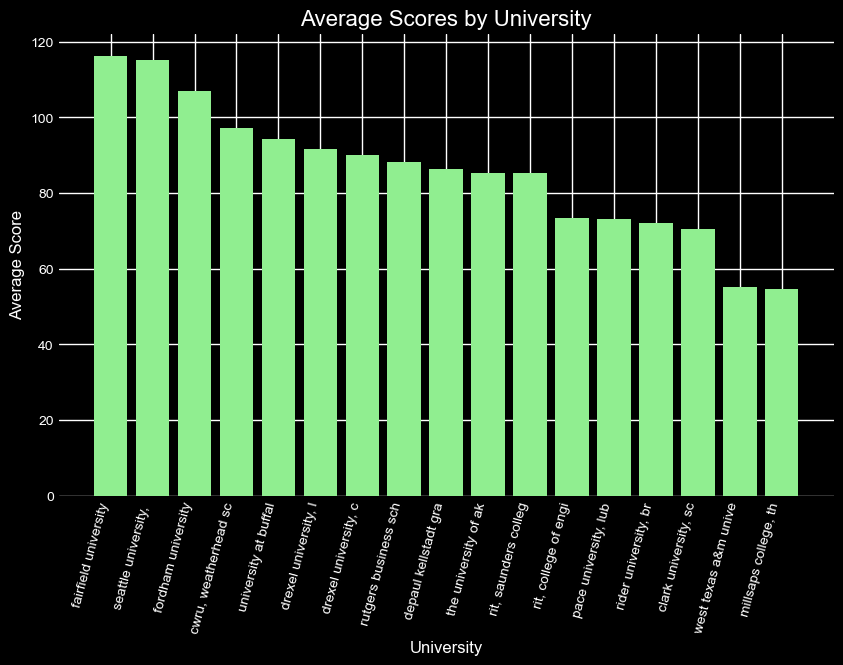

In [189]:
plt.style.use('dark_background') 

average_scores = select_stds_df.groupby('prefopt')['UniScore'].mean()

average_scores = average_scores.sort_values(ascending=False)

print(average_scores)

truncated_labels = [label[:20] for label in average_scores.index]

plt.figure(figsize=(10, 6))
plt.bar(truncated_labels, average_scores, color = 'lightgreen')

plt.xlabel('University')
plt.ylabel('Average Score')
plt.title('Average Scores by University')
plt.xticks(rotation=75, ha='right')
plt.show()

prefopt
pace university, lubin school of business                                    0.00
drexel university, lebow college of business                                53.40
clark university, school of professional studies                            53.88
university at buffalo (suny), school of management                          54.00
depaul kellstadt graduate school of business                                54.40
millsaps college, the else school of management                             54.70
west texas a&m university, paul and virginia engler college of business     55.30
rider university, brodsky college of business                               56.91
rutgers business school                                                     57.30
drexel university, college of engineering                                   62.90
drexel university, college of computing informatics                         63.90
fordham university                                                          65.00
rit, sau

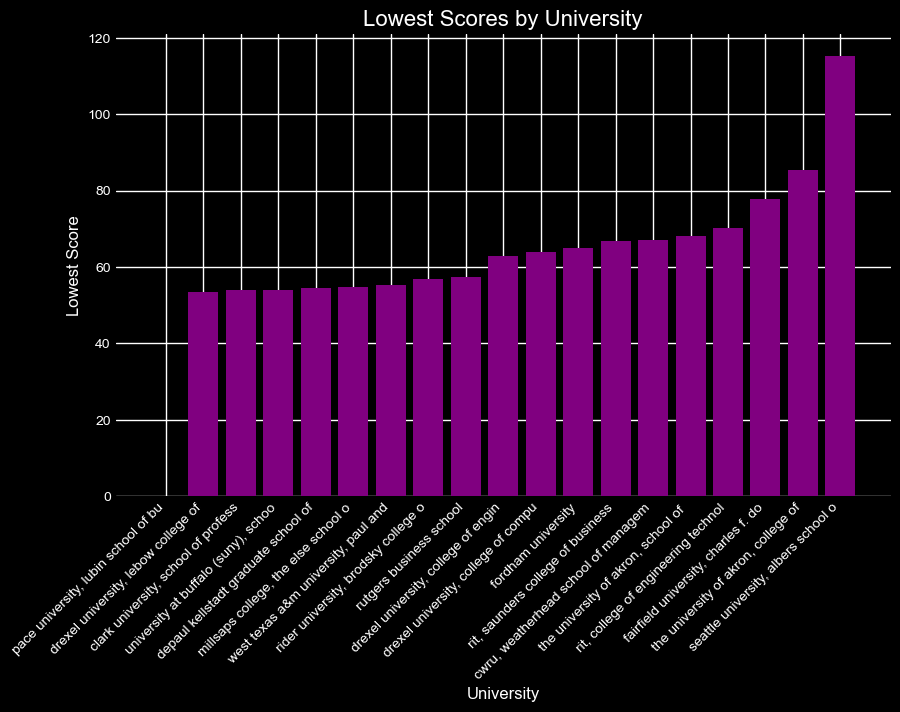

In [160]:
lowest_scores = df.groupby('prefopt')['UniScore'].min()

# Sort lowest scores in ascending order
lowest_scores = lowest_scores.sort_values(ascending=True)

print(lowest_scores)

truncated_labels = [label[:35] for label in lowest_scores.index]

plt.figure(figsize=(10, 6))
plt.bar(truncated_labels, lowest_scores, color = 'purple')

plt.xlabel('University')
plt.ylabel('Lowest Score')
plt.title('Lowest Scores by University')
plt.xticks(rotation=45, ha='right')
plt.show()

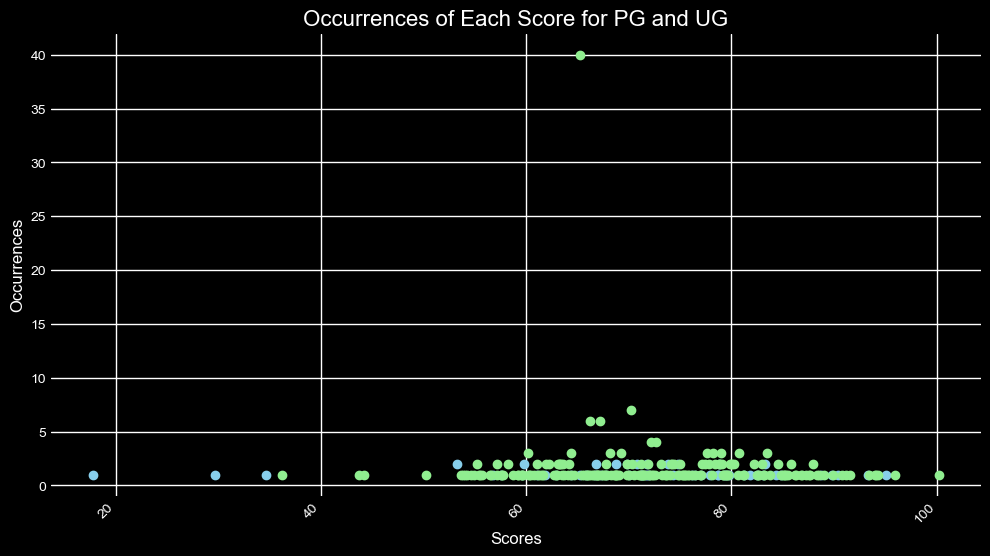

In [162]:
pg_counts = df['PG - CGPA or %'].value_counts().sort_index()
ug_counts = df['UG - CGPA (out of 10) '].value_counts().sort_index()

# Remove zero scores
pg_counts = pg_counts[pg_counts.index != 0]
ug_counts = ug_counts[ug_counts.index != 0]


# Create a DataFrame for plotting
counts_df = pd.DataFrame({
    'PG': pg_counts,
    'UG': ug_counts
})  # Fill NaN values with 0 for missing scores

# Plotting
plt.figure(figsize=(12, 6))

plt.scatter(counts_df.index - 0.2, counts_df['PG'], label='PG', color='skyblue')

plt.scatter(counts_df.index + 0.2, counts_df['UG'], label='UG', color='lightgreen')


plt.xlabel('Scores')
plt.ylabel('Occurrences')
plt.title('Occurrences of Each Score for PG and UG')

x_min = 15
x_max = 120
x_ticks = np.arange(x_min, x_max + 5, 5)

plt.xticks(rotation=45, ha='right')
plt.show()

depaul kellstadt graduate school of business                               45
university at buffalo (suny), school of management                         32
rutgers business school                                                    25
drexel university, college of computing informatics                        20
drexel university, lebow college of business                               19
rit, saunders college of business                                          12
drexel university, college of engineering                                  11
rider university, brodsky college of business                               9
cwru, weatherhead school of management                                      8
clark university, school of professional studies                            7
fairfield university, charles f. dolan school of business                   4
the university of akron, school of engineering and polymer science          4
fordham university                                              

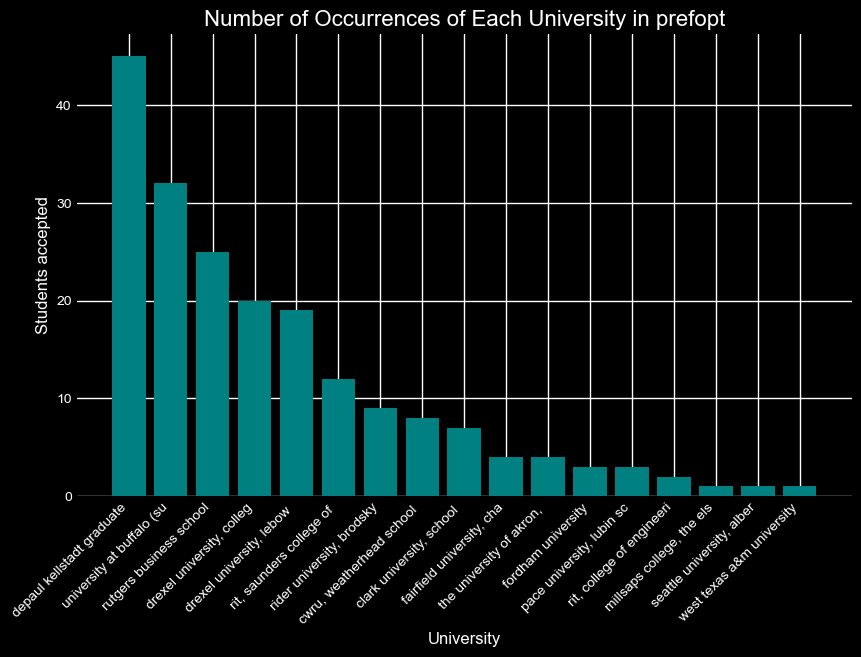

In [163]:
university_counts = df['prefopt'].value_counts()

print(university_counts)


plt.figure(figsize=(10, 6))

truncated_labels = [label[:25] for label in university_counts.index]

plt.bar(truncated_labels, university_counts.values, color='teal')

plt.xlabel('University')
plt.ylabel('Students accepted')
plt.title('Number of Occurrences of Each University in prefopt')
plt.xticks(rotation=45, ha='right')

plt.show()

prefopt
depaul kellstadt graduate school of business                                0.0
drexel university, lebow college of business                                0.0
fairfield university, charles f. dolan school of business                   0.0
fordham university                                                          0.0
university at buffalo (suny), school of management                          0.0
rider university, brodsky college of business                               0.0
the university of akron, college of business                                0.0
rit, saunders college of business                                           0.0
rutgers business school                                                     0.0
cwru, weatherhead school of management                                      0.5
drexel university, college of engineering                                   0.5
clark university, school of professional studies                            1.0
the university of akron, school 

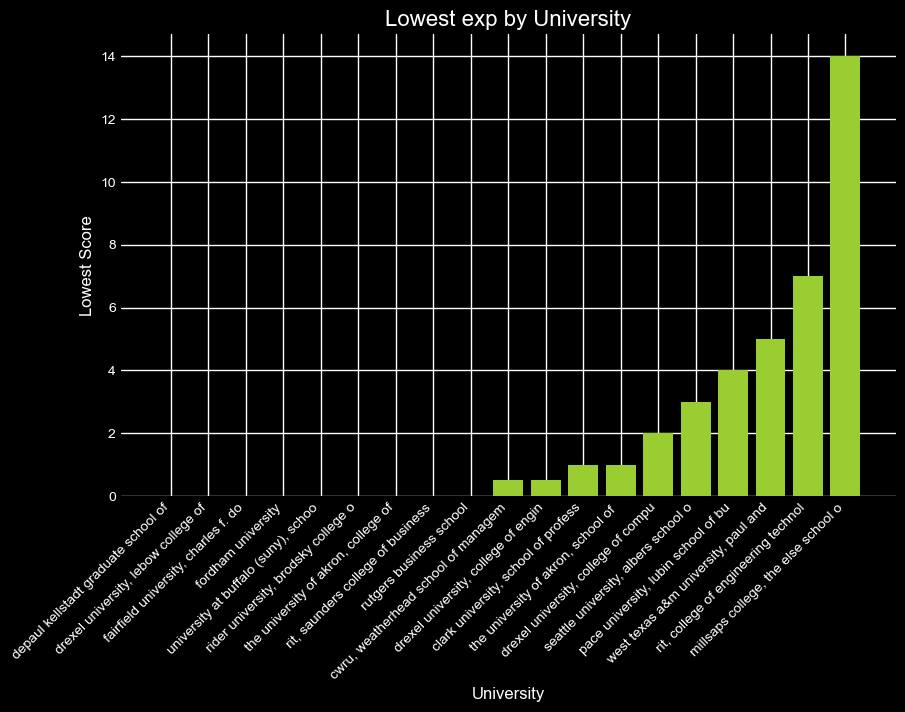

In [172]:

lowest_exp = df.groupby('prefopt')['Work Exp.'].min()

# Sort lowest exp in ascending order
lowest_exp = lowest_exp.sort_values(ascending=True)

print(lowest_exp)

truncated_labels = [label[:35] for label in lowest_exp.index]

plt.figure(figsize=(10, 6))
plt.bar(truncated_labels, lowest_exp, color = 'yellowgreen')

plt.xlabel('University')
plt.ylabel('Lowest Score')
plt.title('Lowest exp by University')
plt.xticks(rotation=45, ha='right')
plt.show()

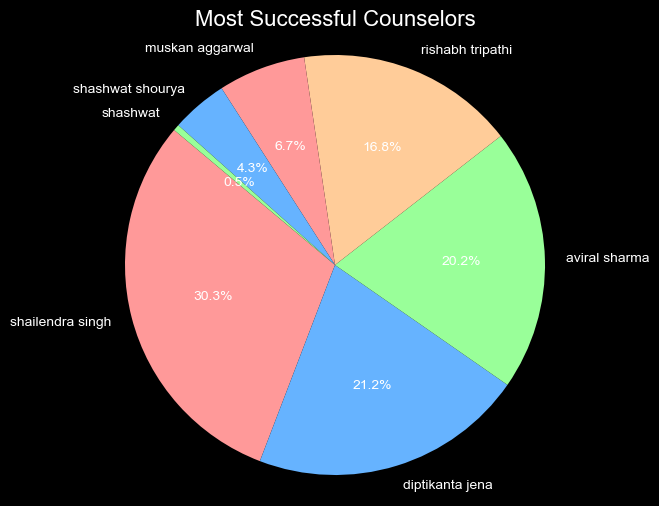

In [183]:
filtered_df = df[df['noopt'] == 1]

# Count occurrences of each counselor's name
counselor_counts = filtered_df['Counselor Name'].value_counts()

# Plot the counts as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counselor_counts, labels=counselor_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

plt.title('Most Successful Counselors')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

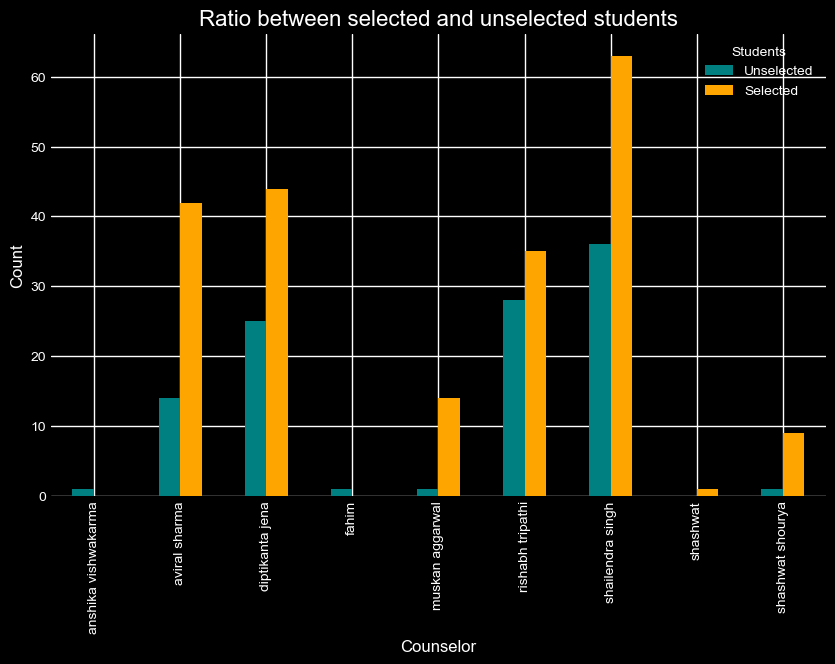

In [187]:
counselor_noopt_counts = df.groupby(['Counselor Name', 'noopt']).size().unstack(fill_value=0)

# Plot the counts
counselor_noopt_counts.plot(kind='bar', figsize=(10, 6), color=['teal', 'orange'])

plt.xlabel('Counselor')
plt.ylabel('Count')
plt.title('Ratio between selected and unselected students')
plt.legend(title='Students', labels=['Unselected', 'Selected'])
plt.xticks(rotation=90)
plt.show()

In [164]:
select_stds_df.to_excel('temp.xlsx')